# Reading and writing molecules 1

This is a short overview of creating molecules from and writing molecules to various file formats. It is intended to be a complement to, not replacement for, the contents of the [main RDKit documentation](http://rdkit.org/docs/index.html)

@TAGS: #basics #molecule_input 

In [20]:
# %pip install rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# uncomment this if you try the tutorial and end up with low-quality images
IPythonConsole.ipython_useSVG=True

In [2]:
import time
print(time.asctime()) # doctest: IGNORE

Fri Jan  5 15:24:14 2024


## Working with SMILES

If you have a SMILES string, the easiest thing to use is MolFromSmiles:

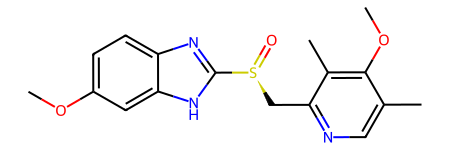

In [21]:
m = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')
m

Note that the coordinates used for the drawing are not present in the molecule, the RDKit generates them when the molecule is drawn.

## Reading Mol file data

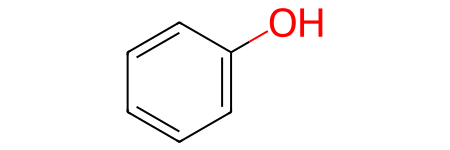

In [22]:
molblock = """phenol
  Mrv1682210081607082D          

  7  7  0  0  0  0            999 V2000
   -0.6473    1.0929    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6473   -0.5572    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7816    1.0929    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  5  2  0  0  0  0
  5  6  1  0  0  0  0
  1  6  2  0  0  0  0
  6  7  1  0  0  0  0
M  END
"""
m = Chem.MolFromMolBlock(molblock)
m

Here the molecule has coordinates that were read in from the Mol block. We can see this because the molecule has a conformer:

In [23]:
m.GetNumConformers()

1

The conformer that is present is 2D (we can see that from the coordinates above):

In [24]:
m.GetConformer().Is3D()

False

Here's another Mol block and the corresponding molecule:

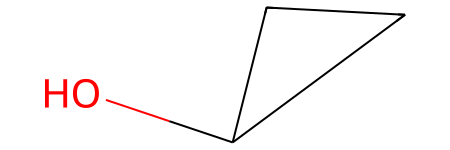

In [25]:
molblock2 ='''cyclopropanol-3D
  Mrv1682210081607153D          

 10 10  0  0  0  0            999 V2000
    0.9159    1.2233    0.2286 C   0  0  1  0  0  0  0  0  0  0  0  0
   -0.0738    1.2748   -0.9428 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.3167    0.3104    0.2232 C   0  0  2  0  0  0  0  0  0  0  0  0
   -1.3658    0.6623    1.1190 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.8730    0.7413    0.0155 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.8835    2.0739    0.9139 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.2747    0.8266   -1.8737 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7163    2.1557   -0.9817 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1264   -0.7446    0.0137 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1210    0.2486    1.9735 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  1  3  1  0  0  0  0
  3  4  1  0  0  0  0
  1  5  1  0  0  0  0
  1  6  1  0  0  0  0
  2  7  1  0  0  0  0
  2  8  1  0  0  0  0
  3  9  1  0  0  0  0
  4 10  1  0  0  0  0
M  END
'''
m2 = Chem.MolFromMolBlock(molblock2)
m2

The odd coordinates in the drawing is because the molecule has a 3D conformer:

In [26]:
m2.GetConformer().Is3D()

True

Notice that no Hs were drawn even though there are clearly H atoms in the Mol block. The default behavior for the RDKit Mol block reader is to remove Hs from the input molecule. If we want to keep the Hs and their coordinates, this behavior can be turned off:

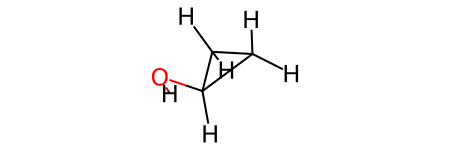

In [11]:
m2_h = Chem.MolFromMolBlock(molblock2,removeHs=False)
m2_h

## Reading PDB data

This time we'll read from a file instead of embedding the text in the notebook. We also won't try to display the molecule itself, since that isn't particularly informative for a large molecule.

In [12]:
crn = Chem.MolFromPDBFile('../data/1CRN.pdb')
crn.GetNumAtoms()

327

In order to be able to show something useful with the proteins, let's get the amino-acid sequence:

In [13]:
# get the residue information for each atom:
residues = [atom.GetPDBResidueInfo() for atom in crn.GetAtoms()]
# and now the number and name of each residue
resinf = [(res.GetResidueNumber(),res.GetResidueName()) for res in residues]
# take a look at those:
resinf[:10]

[(1, 'THR'),
 (1, 'THR'),
 (1, 'THR'),
 (1, 'THR'),
 (1, 'THR'),
 (1, 'THR'),
 (1, 'THR'),
 (2, 'THR'),
 (2, 'THR'),
 (2, 'THR')]

In [14]:
# and get the ordered list of actual residues:
residues = sorted(set(resinf))
len(residues)

46

In [15]:
residues[:5]

[(1, 'THR'), (2, 'THR'), (3, 'CYS'), (4, 'CYS'), (5, 'PRO')]

## Reading other sequence formats

We can also create molecules from a few sequence formats:

In [16]:
seq = 'TTCCPSIVAR SNFNVCRLPG TPEAICATYT GCIIIPGATC PGDYAN'
m = Chem.MolFromSequence(seq)
m.GetNumAtoms()

327

In [17]:
helm = 'PEPTIDE1{T.T.C.C.P.S.I.V.A.R.S.N.F.N.V.C.R.L.P.G.T.P.E.A.I.C.A.T.Y.T.G.C.I.I.I.P.G.A.T.C.P.G.D.Y.A.N}$$$$'
m = Chem.MolFromHELM(helm)
m.GetNumAtoms()

327

In [18]:
fasta =""">
TTCCPSIVARSNFNVCRLPGTPEAICATYTGCIIIPGATCPGDYAN
"""
m = Chem.MolFromFASTA(fasta)
m.GetNumAtoms()

327